In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load your dataset
# Assuming you have your historical data in a DataFrame called 'data'
data = pd.read_csv('../data/cleaned_financial_data.csv')

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Prepare the data for the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Example sequence length
X_train, y_train = create_sequences(train_data['Close_TSLA'].values, seq_length)
X_test, y_test = create_sequences(test_data['Close_TSLA'].values, seq_length)

# Reshape the data for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Generate future timestamps (e.g., for the next 12 months)
future_timestamps = pd.date_range(start=test_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Create an empty array to store the predictions
future_predictions = []

# Use the last available data point for predictions
last_data_point = X_test[-1]

# Forecast for each future timestamp
for _ in future_timestamps:
    # Predict the next value
    next_value = model.predict(last_data_point.reshape(1, last_data_point.shape[0], 1))
    future_predictions.append(next_value[0][0])

    # Update the last_data_point with the new prediction
    last_data_point = np.append(last_data_point[1:], next_value[0][0]).reshape(-1, 1)

# Convert predictions to a DataFrame
future_predictions_df = pd.DataFrame(data=future_predictions, index=future_timestamps, columns=['Predicted_Close'])


/home/enat/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 6299.9517 - val_loss: 69880.6953
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 6034.5366 - val_loss: 68035.5938
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5661.0098 - val_loss: 66702.2266
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4990.5278 - val_loss: 65482.8750
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4938.5493 - val_loss: 64350.1016
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5104.2202 - val_loss: 63314.6445
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4365.5537 - val_loss: 62377.6484
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5165.0977 - val_loss: 61466.3906
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4943.2676 - val_loss: 60651.1055
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4556.9399 - val_loss: 59749.6562
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4324.7749 - val_los

/tmp/ipykernel_9712/2694479348.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_timestamps = pd.date_range(start=test_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


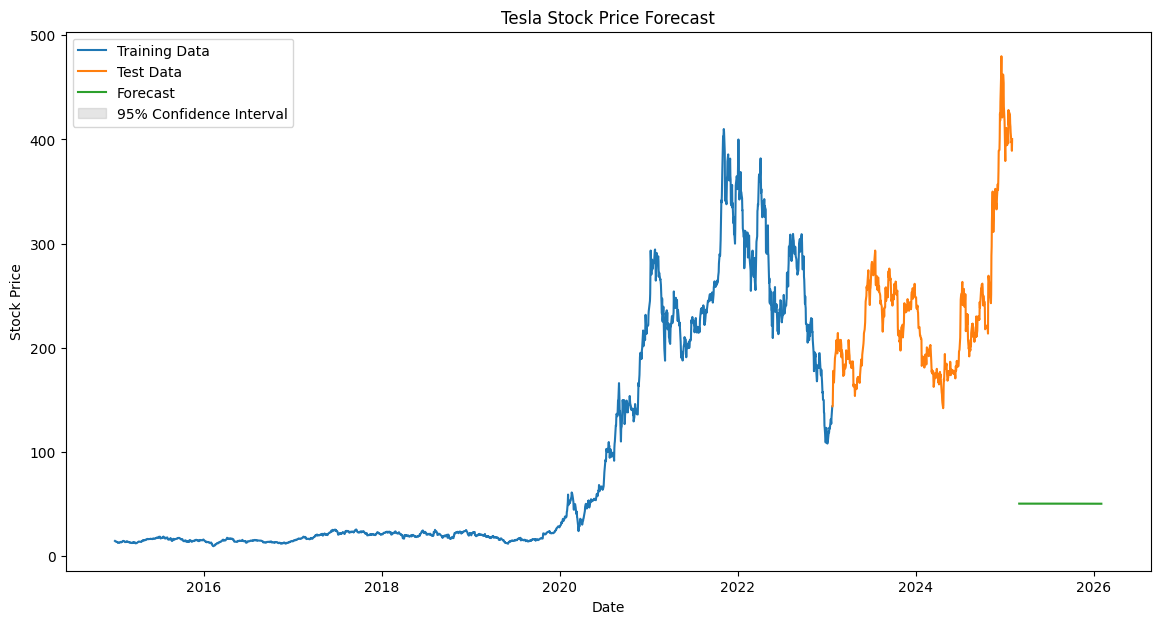

In [12]:
# Plot historical data
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close_TSLA'], label='Training Data')
plt.plot(test_data.index, test_data['Close_TSLA'], label='Test Data')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted_Close'], label='Forecast')

# Add confidence intervals (assuming a 95% confidence interval)
confidence_interval = 1.96 * np.std(future_predictions)
plt.fill_between(future_predictions_df.index,
                 future_predictions_df['Predicted_Close'] - confidence_interval,
                 future_predictions_df['Predicted_Close'] + confidence_interval,
                 color='gray', alpha=0.2, label='95% Confidence Interval')

plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [9]:
# Trend Analysis
trend = 'stable'
if future_predictions_df['Predicted_Close'].iloc[-1] > future_predictions_df['Predicted_Close'].iloc[0]:
    trend = 'upward'
elif future_predictions_df['Predicted_Close'].iloc[-1] < future_predictions_df['Predicted_Close'].iloc[0]:
    trend = 'downward'

# Volatility and Risk
volatility = np.std(future_predictions_df['Predicted_Close'])
risk_intervals = future_predictions_df['Predicted_Close'] - confidence_interval

# Market Opportunities and Risks
opportunities = future_predictions_df[future_predictions_df['Predicted_Close'] > test_data['Close_TSLA'].mean()]
risks = future_predictions_df[future_predictions_df['Predicted_Close'] < test_data['Close_TSLA'].mean()]

# Print Analysis
print(f"Trend Analysis: The forecast shows a {trend} trend.")
print(f"Volatility Analysis: The forecasted volatility is {volatility:.2f}.")
print(f"Opportunities: There are potential opportunities for price increases in the following periods:\n{opportunities}")
print(f"Risks: There are potential risks for price declines in the following periods:\n{risks}")


Trend Analysis: The forecast shows a downward trend.
Volatility Analysis: The forecasted volatility is 0.01.
Opportunities: There are potential opportunities for price increases in the following periods:
Empty DataFrame
Columns: [Predicted_Close]
Index: []
Risks: There are potential risks for price declines in the following periods:
                               Predicted_Close
1970-01-31 00:00:00.000002534        53.207458
1970-02-28 00:00:00.000002534        53.206760
1970-03-31 00:00:00.000002534        53.206631
1970-04-30 00:00:00.000002534        53.206440
1970-05-31 00:00:00.000002534        53.205952
1970-06-30 00:00:00.000002534        53.205235
1970-07-31 00:00:00.000002534        53.204212
1970-08-31 00:00:00.000002534        53.202461
1970-09-30 00:00:00.000002534        53.199554
1970-10-31 00:00:00.000002534        53.195232
1970-11-30 00:00:00.000002534        53.189373
1970-12-31 00:00:00.000002534        53.182026
